In [19]:
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/Lab/'

Mounted at /content/drive


In [1]:
from utils import *
from image_transform import ImageTransform
from loader import Loader
from model7 import Net, SeparableConv2d
from train import TrainModel
from test import TestModel
from ghost_batchnormalization import GhostBatchNorm
from regularization import Regularization as reg

In [4]:
IMAGE_PATH = "/content/drive/My Drive/Lab/images/"
MODEL_PATH = "/content/drive/My Drive/Lab/models/"

# For Graph
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

# Hyper parameters
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=0.0001
EPOCHS = 50

# Transforms
transform_train = [
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
]

transform_test = [
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
]

t_transform_train = ImageTransform.transform(transform_train)
t_transform_test = ImageTransform.transform(transform_test)

# Dataset and DataLoader arguments
dataset_name = torchvision.datasets.CIFAR10
trainSet_dict = dict(root='./data', train=True, download=True, transform=t_transform_train)
trainLoad_dict = dict(batch_size=32, shuffle=True, num_workers=4)
testSet_dict = dict(root='./data', train=False, download=True, transform=t_transform_test)
testLoad_dict = dict(batch_size=32, shuffle=False, num_workers=4)


  
# Device
SEED = 1
cuda = torch.cuda.is_available()
print("Cuda is available ?", cuda)
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

# Create Train and Test Loader
trainloader = Loader.getDataLoader(dataset_name, trainSet_dict, trainLoad_dict)
testloader = Loader.getDataLoader(dataset_name, testSet_dict, testLoad_dict)
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Loss Function
criterion = nn.NLLLoss()

# Optimizer
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Start training
for epoch in range(50):
  train_loss, train_acc = TrainModel.train(model, device, trainloader, criterion, optimizer, epoch)
  train_losses.append(train_loss)
  train_accuracy.append(train_acc)
  test_loss, test_acc = TestModel.test(model, device, testloader, criterion)
  test_losses.append(test_loss)
  test_accuracy.append(test_acc)

#Plot and Save Graph
#getPlottedGraph(15, train_losses, train_accuracy, test_losses, test_accuracy)

#Save Models
torch.save(model2.state_dict(), MODEL_PATH+"model7.pth")







Cuda is available ? True
Files already downloaded and verified
Files already downloaded and verified


/content/ghost_batchnormalization.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.weight.data.fill_(1.0)).cuda()
/content/ghost_batchnormalization.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.bias.data.fill_(0.0)).cuda()


: EPOCH= 0 Loss= 1.4292 Batch_id= 1562 Accuracy= 44.88: 100%|██████████| 1563/1563 [00:40<00:00, 38.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0345 Batch_id= 312 Accuracy= 6045/10000 (60.45%)



: EPOCH= 1 Loss= 1.3967 Batch_id= 1562 Accuracy= 61.51: 100%|██████████| 1563/1563 [00:41<00:00, 37.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0311 Batch_id= 312 Accuracy= 6587/10000 (65.87%)



: EPOCH= 2 Loss= 0.8712 Batch_id= 1562 Accuracy= 68.40: 100%|██████████| 1563/1563 [00:41<00:00, 37.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0247 Batch_id= 312 Accuracy= 7301/10000 (73.01%)



: EPOCH= 3 Loss= 0.7681 Batch_id= 1562 Accuracy= 71.94: 100%|██████████| 1563/1563 [00:42<00:00, 36.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0238 Batch_id= 312 Accuracy= 7447/10000 (74.47%)



: EPOCH= 4 Loss= 0.5191 Batch_id= 1562 Accuracy= 73.97: 100%|██████████| 1563/1563 [00:42<00:00, 37.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0202 Batch_id= 312 Accuracy= 7783/10000 (77.83%)



: EPOCH= 5 Loss= 0.7188 Batch_id= 1562 Accuracy= 75.79: 100%|██████████| 1563/1563 [00:42<00:00, 36.51it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0193 Batch_id= 312 Accuracy= 7847/10000 (78.47%)



: EPOCH= 6 Loss= 1.3202 Batch_id= 1562 Accuracy= 76.78: 100%|██████████| 1563/1563 [00:42<00:00, 37.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0183 Batch_id= 312 Accuracy= 8019/10000 (80.19%)



: EPOCH= 7 Loss= 0.5276 Batch_id= 1562 Accuracy= 78.08: 100%|██████████| 1563/1563 [00:42<00:00, 36.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0181 Batch_id= 312 Accuracy= 8000/10000 (80.00%)



: EPOCH= 8 Loss= 0.7957 Batch_id= 1562 Accuracy= 78.75: 100%|██████████| 1563/1563 [00:42<00:00, 37.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0164 Batch_id= 312 Accuracy= 8165/10000 (81.65%)



: EPOCH= 9 Loss= 0.9889 Batch_id= 1562 Accuracy= 79.57: 100%|██████████| 1563/1563 [00:42<00:00, 37.20it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0169 Batch_id= 312 Accuracy= 8154/10000 (81.54%)



: EPOCH= 10 Loss= 0.9336 Batch_id= 1562 Accuracy= 80.20: 100%|██████████| 1563/1563 [00:42<00:00, 37.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0166 Batch_id= 312 Accuracy= 8209/10000 (82.09%)



: EPOCH= 11 Loss= 0.6532 Batch_id= 1562 Accuracy= 80.70: 100%|██████████| 1563/1563 [00:42<00:00, 36.78it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0179 Batch_id= 312 Accuracy= 8115/10000 (81.15%)



: EPOCH= 12 Loss= 0.5759 Batch_id= 1562 Accuracy= 81.35: 100%|██████████| 1563/1563 [00:42<00:00, 37.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0157 Batch_id= 312 Accuracy= 8315/10000 (83.15%)



: EPOCH= 13 Loss= 0.4397 Batch_id= 1562 Accuracy= 81.41: 100%|██████████| 1563/1563 [00:41<00:00, 37.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0163 Batch_id= 312 Accuracy= 8250/10000 (82.50%)



: EPOCH= 14 Loss= 0.6271 Batch_id= 1562 Accuracy= 82.19: 100%|██████████| 1563/1563 [00:41<00:00, 37.27it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0156 Batch_id= 312 Accuracy= 8291/10000 (82.91%)



: EPOCH= 15 Loss= 0.2004 Batch_id= 1562 Accuracy= 82.52: 100%|██████████| 1563/1563 [00:41<00:00, 37.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0148 Batch_id= 312 Accuracy= 8428/10000 (84.28%)



: EPOCH= 16 Loss= 0.5353 Batch_id= 1562 Accuracy= 82.83: 100%|██████████| 1563/1563 [00:41<00:00, 37.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0170 Batch_id= 312 Accuracy= 8201/10000 (82.01%)



: EPOCH= 17 Loss= 0.4419 Batch_id= 1562 Accuracy= 83.24: 100%|██████████| 1563/1563 [00:42<00:00, 37.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0150 Batch_id= 312 Accuracy= 8396/10000 (83.96%)



: EPOCH= 18 Loss= 0.2805 Batch_id= 1562 Accuracy= 83.60: 100%|██████████| 1563/1563 [00:42<00:00, 36.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0150 Batch_id= 312 Accuracy= 8399/10000 (83.99%)



: EPOCH= 19 Loss= 0.7083 Batch_id= 1562 Accuracy= 83.78: 100%|██████████| 1563/1563 [00:41<00:00, 37.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0144 Batch_id= 312 Accuracy= 8467/10000 (84.67%)



: EPOCH= 20 Loss= 0.3937 Batch_id= 1562 Accuracy= 84.30: 100%|██████████| 1563/1563 [00:41<00:00, 37.52it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0152 Batch_id= 312 Accuracy= 8440/10000 (84.40%)



: EPOCH= 21 Loss= 0.4013 Batch_id= 1562 Accuracy= 84.61: 100%|██████████| 1563/1563 [00:41<00:00, 37.83it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0148 Batch_id= 312 Accuracy= 8415/10000 (84.15%)



: EPOCH= 22 Loss= 0.8013 Batch_id= 1562 Accuracy= 84.59: 100%|██████████| 1563/1563 [00:41<00:00, 37.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0142 Batch_id= 312 Accuracy= 8481/10000 (84.81%)



: EPOCH= 23 Loss= 0.2474 Batch_id= 1562 Accuracy= 84.99: 100%|██████████| 1563/1563 [00:41<00:00, 37.71it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0134 Batch_id= 312 Accuracy= 8559/10000 (85.59%)



: EPOCH= 24 Loss= 0.3479 Batch_id= 1562 Accuracy= 85.08: 100%|██████████| 1563/1563 [00:41<00:00, 37.49it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0137 Batch_id= 312 Accuracy= 8582/10000 (85.82%)



: EPOCH= 25 Loss= 0.4824 Batch_id= 1562 Accuracy= 85.42: 100%|██████████| 1563/1563 [00:41<00:00, 37.25it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0156 Batch_id= 312 Accuracy= 8367/10000 (83.67%)



: EPOCH= 26 Loss= 0.3058 Batch_id= 1562 Accuracy= 85.24: 100%|██████████| 1563/1563 [00:41<00:00, 37.47it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0136 Batch_id= 312 Accuracy= 8569/10000 (85.69%)



: EPOCH= 27 Loss= 0.6762 Batch_id= 1562 Accuracy= 85.70: 100%|██████████| 1563/1563 [00:41<00:00, 37.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0131 Batch_id= 312 Accuracy= 8574/10000 (85.74%)



: EPOCH= 28 Loss= 0.4993 Batch_id= 1562 Accuracy= 86.00: 100%|██████████| 1563/1563 [00:41<00:00, 37.74it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0134 Batch_id= 312 Accuracy= 8596/10000 (85.96%)



: EPOCH= 29 Loss= 0.1391 Batch_id= 1562 Accuracy= 86.11: 100%|██████████| 1563/1563 [00:41<00:00, 37.65it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0138 Batch_id= 312 Accuracy= 8535/10000 (85.35%)



: EPOCH= 30 Loss= 0.5807 Batch_id= 1562 Accuracy= 86.47: 100%|██████████| 1563/1563 [00:41<00:00, 37.82it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0141 Batch_id= 312 Accuracy= 8482/10000 (84.82%)



: EPOCH= 31 Loss= 1.2638 Batch_id= 1562 Accuracy= 86.18: 100%|██████████| 1563/1563 [00:41<00:00, 37.60it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0134 Batch_id= 312 Accuracy= 8585/10000 (85.85%)



: EPOCH= 32 Loss= 0.3940 Batch_id= 1562 Accuracy= 86.61: 100%|██████████| 1563/1563 [00:42<00:00, 37.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0164 Batch_id= 312 Accuracy= 8352/10000 (83.52%)



: EPOCH= 33 Loss= 0.2353 Batch_id= 1562 Accuracy= 86.50: 100%|██████████| 1563/1563 [00:41<00:00, 37.56it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0142 Batch_id= 312 Accuracy= 8468/10000 (84.68%)



: EPOCH= 34 Loss= 0.6358 Batch_id= 1562 Accuracy= 86.66: 100%|██████████| 1563/1563 [00:42<00:00, 37.07it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0128 Batch_id= 312 Accuracy= 8634/10000 (86.34%)



: EPOCH= 35 Loss= 0.3920 Batch_id= 1562 Accuracy= 87.05: 100%|██████████| 1563/1563 [00:42<00:00, 37.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0134 Batch_id= 312 Accuracy= 8601/10000 (86.01%)



: EPOCH= 36 Loss= 0.6916 Batch_id= 1562 Accuracy= 86.94: 100%|██████████| 1563/1563 [00:41<00:00, 37.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0125 Batch_id= 312 Accuracy= 8713/10000 (87.13%)



: EPOCH= 37 Loss= 1.1411 Batch_id= 1562 Accuracy= 87.19: 100%|██████████| 1563/1563 [00:41<00:00, 37.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0124 Batch_id= 312 Accuracy= 8643/10000 (86.43%)



: EPOCH= 38 Loss= 0.6110 Batch_id= 1562 Accuracy= 87.31: 100%|██████████| 1563/1563 [00:41<00:00, 37.42it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0132 Batch_id= 312 Accuracy= 8603/10000 (86.03%)



: EPOCH= 39 Loss= 1.1360 Batch_id= 1562 Accuracy= 87.27: 100%|██████████| 1563/1563 [00:42<00:00, 37.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0122 Batch_id= 312 Accuracy= 8708/10000 (87.08%)



: EPOCH= 40 Loss= 0.1366 Batch_id= 1562 Accuracy= 87.63: 100%|██████████| 1563/1563 [00:41<00:00, 37.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0118 Batch_id= 312 Accuracy= 8741/10000 (87.41%)



: EPOCH= 41 Loss= 0.1069 Batch_id= 1562 Accuracy= 87.49: 100%|██████████| 1563/1563 [00:41<00:00, 37.52it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0134 Batch_id= 312 Accuracy= 8642/10000 (86.42%)



: EPOCH= 42 Loss= 0.2577 Batch_id= 1562 Accuracy= 87.51: 100%|██████████| 1563/1563 [00:41<00:00, 37.65it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0137 Batch_id= 312 Accuracy= 8601/10000 (86.01%)



: EPOCH= 43 Loss= 0.4349 Batch_id= 1562 Accuracy= 87.83: 100%|██████████| 1563/1563 [00:41<00:00, 37.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0133 Batch_id= 312 Accuracy= 8653/10000 (86.53%)



: EPOCH= 44 Loss= 0.2003 Batch_id= 1562 Accuracy= 87.89: 100%|██████████| 1563/1563 [00:41<00:00, 37.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0122 Batch_id= 312 Accuracy= 8730/10000 (87.30%)



: EPOCH= 45 Loss= 0.3359 Batch_id= 1562 Accuracy= 88.11: 100%|██████████| 1563/1563 [00:41<00:00, 37.34it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0123 Batch_id= 312 Accuracy= 8702/10000 (87.02%)



: EPOCH= 46 Loss= 0.6883 Batch_id= 1562 Accuracy= 87.88: 100%|██████████| 1563/1563 [00:42<00:00, 36.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0123 Batch_id= 312 Accuracy= 8678/10000 (86.78%)



: EPOCH= 47 Loss= 0.3735 Batch_id= 1562 Accuracy= 88.15: 100%|██████████| 1563/1563 [00:41<00:00, 37.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0118 Batch_id= 312 Accuracy= 8746/10000 (87.46%)



: EPOCH= 48 Loss= 0.3581 Batch_id= 1562 Accuracy= 88.05: 100%|██████████| 1563/1563 [00:42<00:00, 36.84it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0130 Batch_id= 312 Accuracy= 8646/10000 (86.46%)



: EPOCH= 49 Loss= 0.3509 Batch_id= 1562 Accuracy= 88.11: 100%|██████████| 1563/1563 [00:42<00:00, 36.80it/s]



Test set: Average Loss= 0.0132 Batch_id= 312 Accuracy= 8607/10000 (86.07%)



In [5]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
    GhostBatchNorm-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           2,048
              ReLU-6           [-1, 32, 32, 32]               0
    GhostBatchNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
   GhostBatchNorm-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
             ReLU-14          [-1, 128,

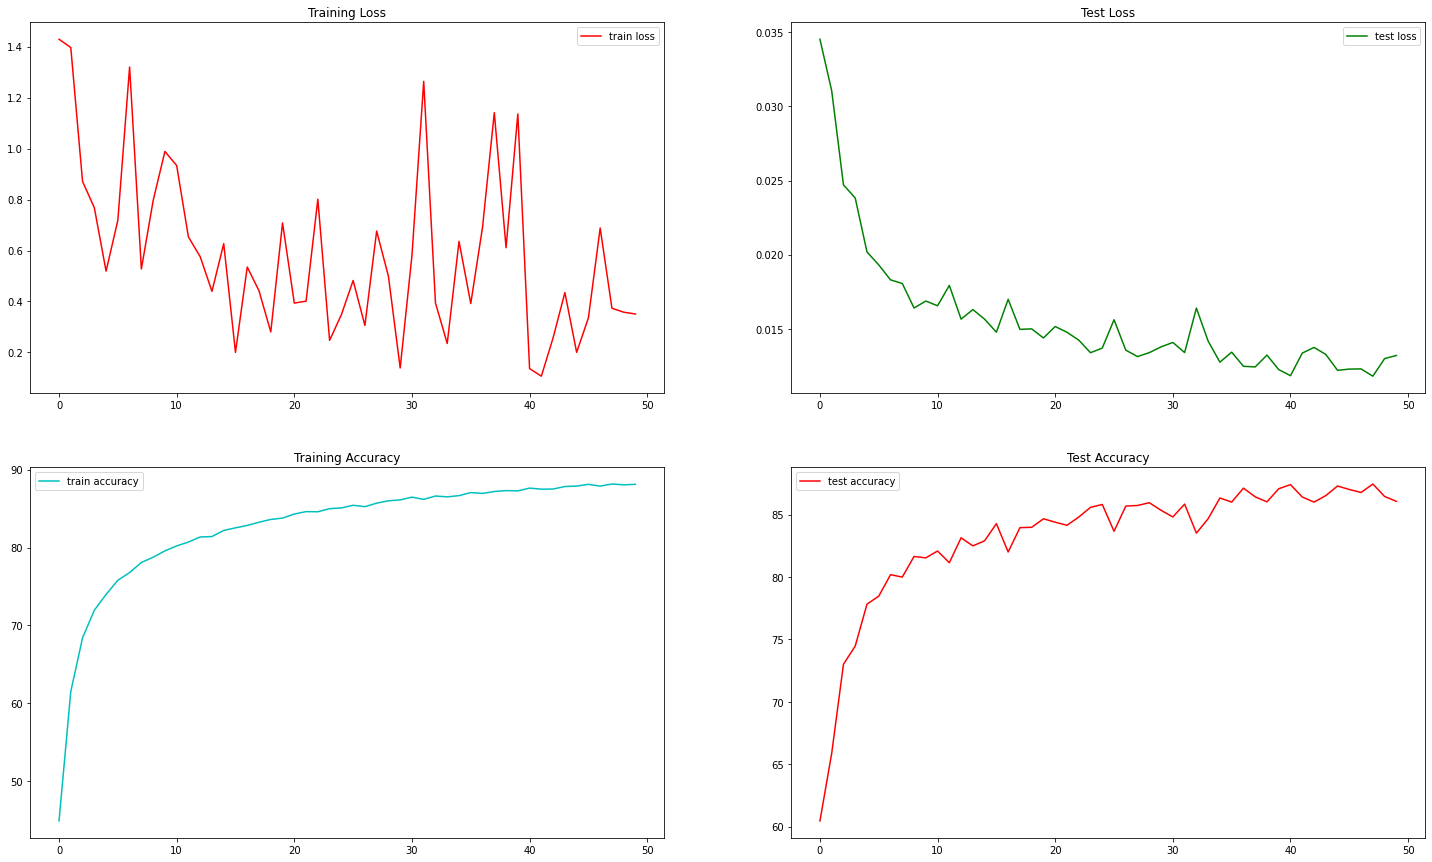

In [21]:
getPlottedGraph(EPOCHS, train_losses, train_accuracy, test_losses, test_accuracy,name="cifar_10_plot", PATH=IMAGE_PATH)

In [22]:
torch.save(model.state_dict(), MODEL_PATH+"model_cifar_10.pth")